In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
frame = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
frame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
frame.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


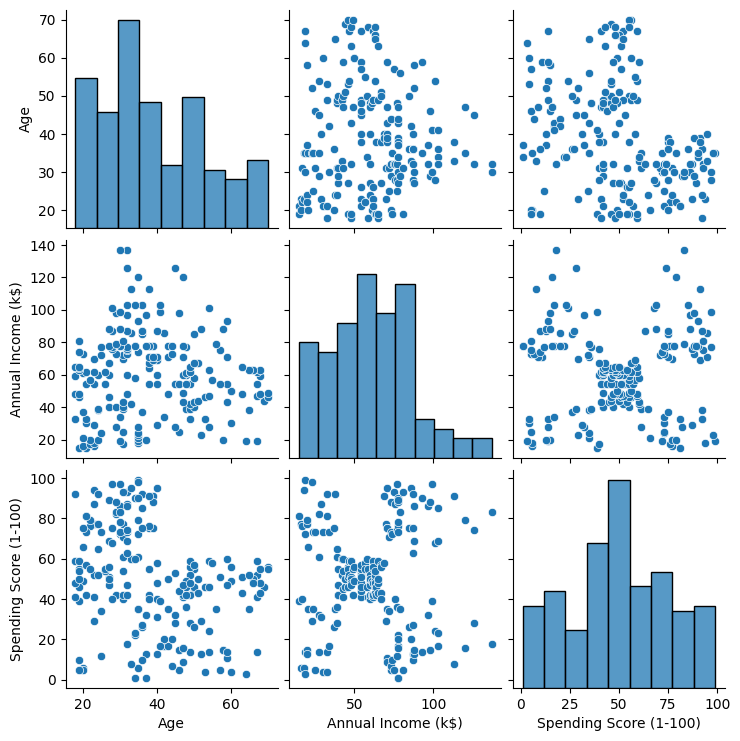

In [23]:
sns.pairplot(frame[['Age','Annual Income (k$)','Spending Score (1-100)']])

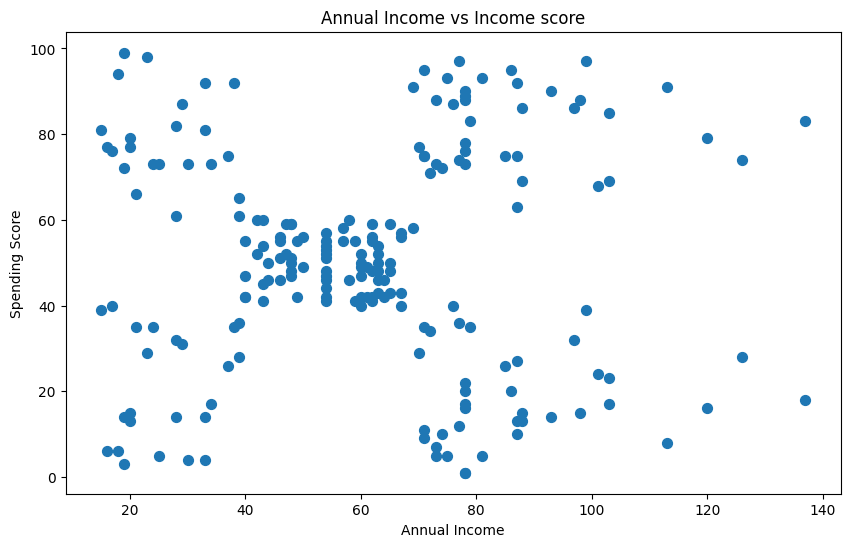

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(frame['Annual Income (k$)'], frame['Spending Score (1-100)'], s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Income score')
plt.show()

In [37]:
from sklearn.cluster import KMeans
X=frame[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss=[]
for i in range(1,11):
   kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state = 0)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)

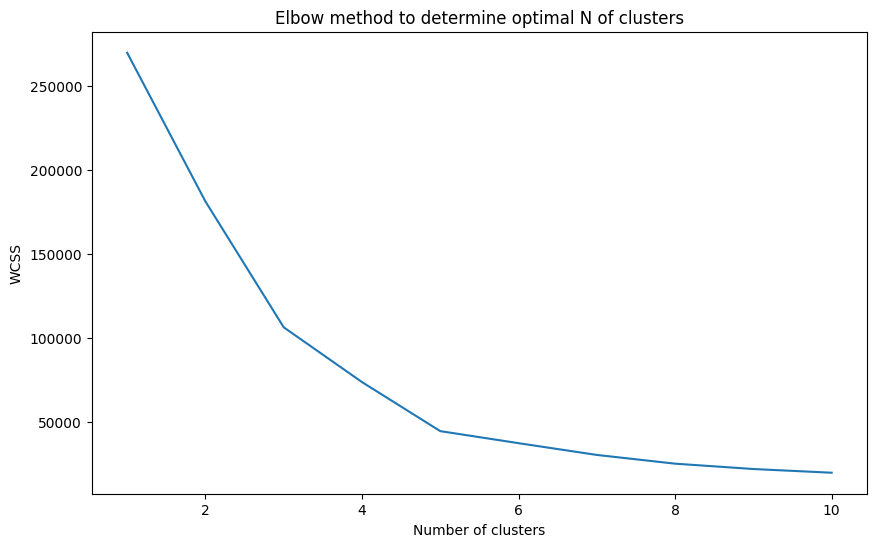

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of clusters')
plt.show()

In [41]:
kmeans=KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)
frame ['Cluster']=y_kmeans
frame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


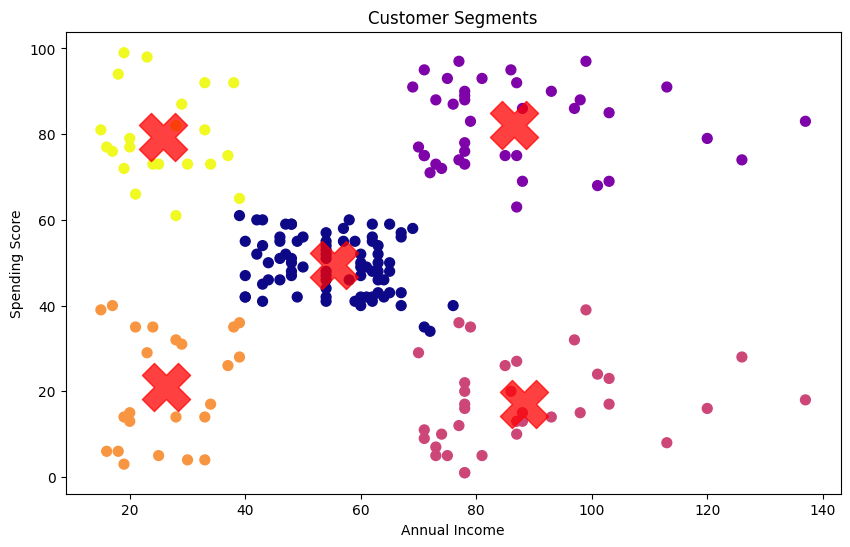

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=1200, alpha=0.75, marker='X')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

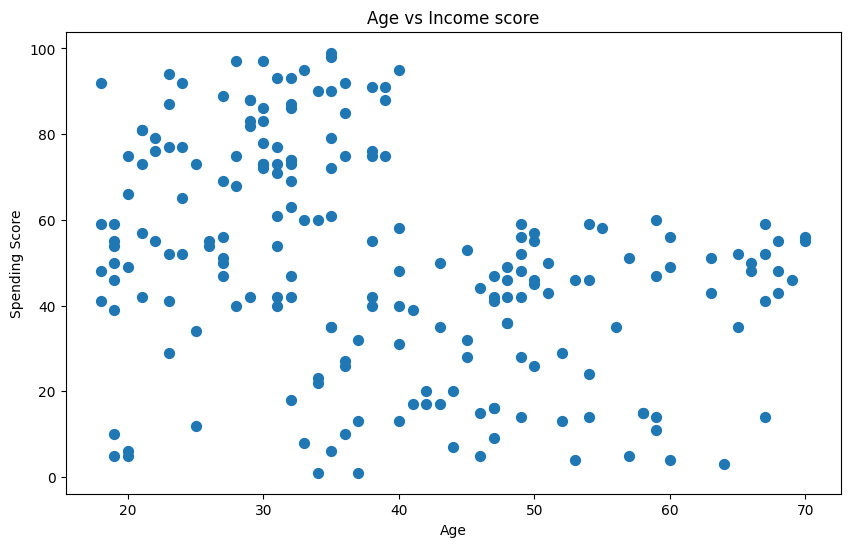

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(frame['Age'], frame['Spending Score (1-100)'], s=50)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Income score')
plt.show()

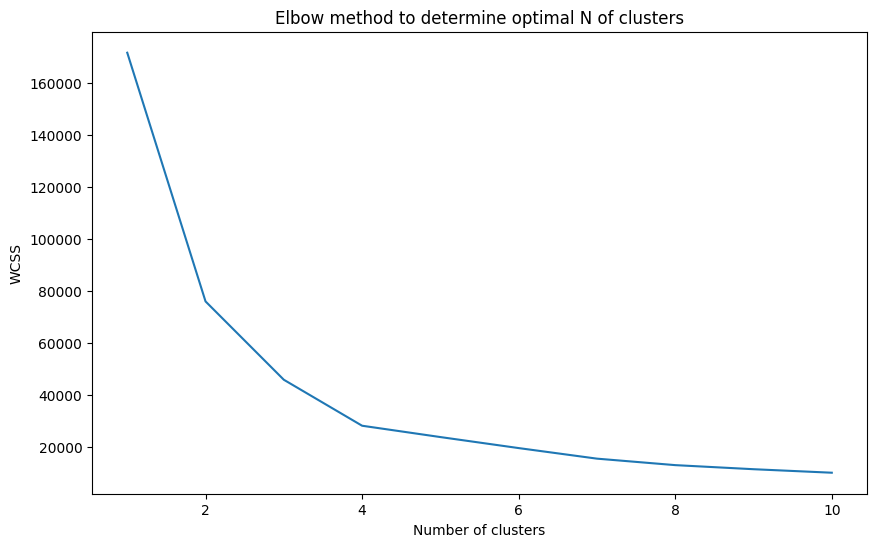

In [55]:
X= frame[['Age', 'Spending Score (1-100)']]
wcss = []
for i in range(1,11):
  kmeans=KMeans (n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of clusters')
plt.show()

In [57]:
kmeans= KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)
frame ['ClusterAge']= y_kmeans
frame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,ClusterAge
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


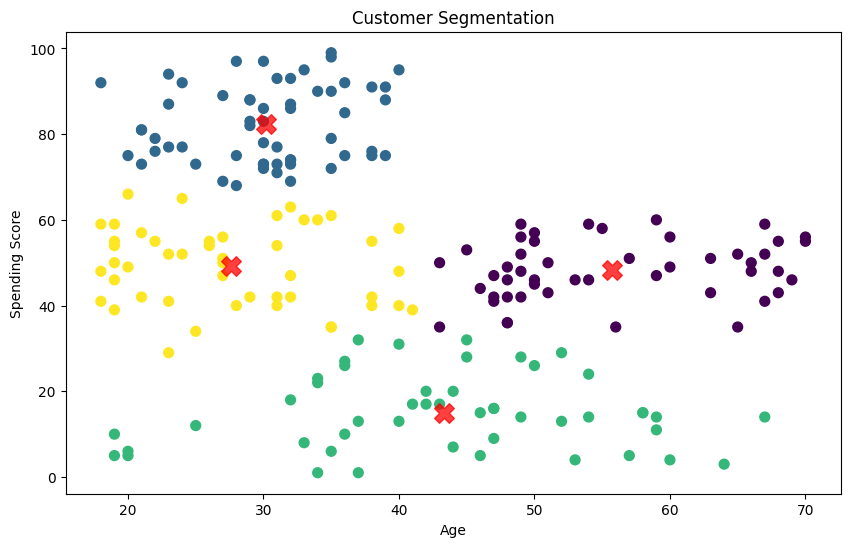

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter (X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()